# This is a  Regression & Classification project

A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION
1 - Can your dating profile predict your age?
2 - Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)
Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore the above questions using supervised machine learning techniques. You will examine different aspects or features of user profiles and see which ones you will integrate into your models to achieve the most satisfactory scores. You will use regression techniques to tackle the first question and classification models to address the second.
By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old.

In [1]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df=pd.read_csv('profiles.csv')

/var/folders/7w/sfqhq6jd47gg5c2xyhv9229w0000gn/T/ipykernel_4443/713461728.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('profiles.csv')


In [3]:
#EDA - Explorary Data Analysis

In [4]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
df.sample(10)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
8412,36.0,average,NaN,socially,never,graduated from masters program,my friends gave me the odd screen name right a...,"wasting my youth? just kidding, i work in life...","going through airport security really quickly,...",i guess my smile- although i'm somewhat sensit...,...,"burlingame, california",NaN,straight,dislikes cats,NaN,f,NaN,no,english,single
16413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [8]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [9]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [10]:
df.shape

(60552, 31)

Data Visualization

<Axes: xlabel='drinks', ylabel='count'>

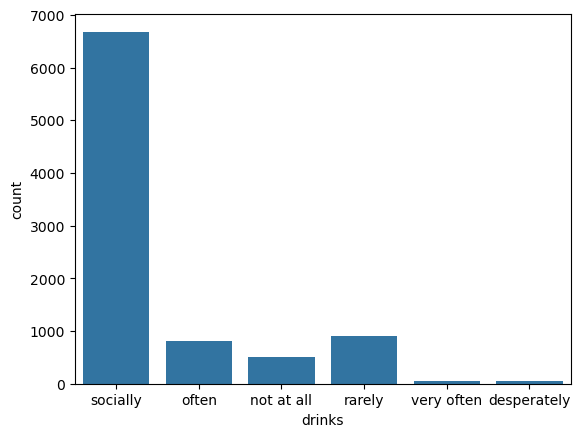

In [11]:
sns.countplot(x=df['drinks'])

<Axes: xlabel='drugs', ylabel='count'>

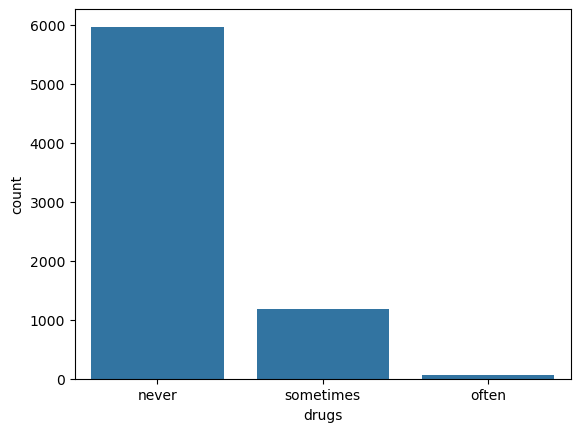

In [12]:
sns.countplot(x=df['drugs'])

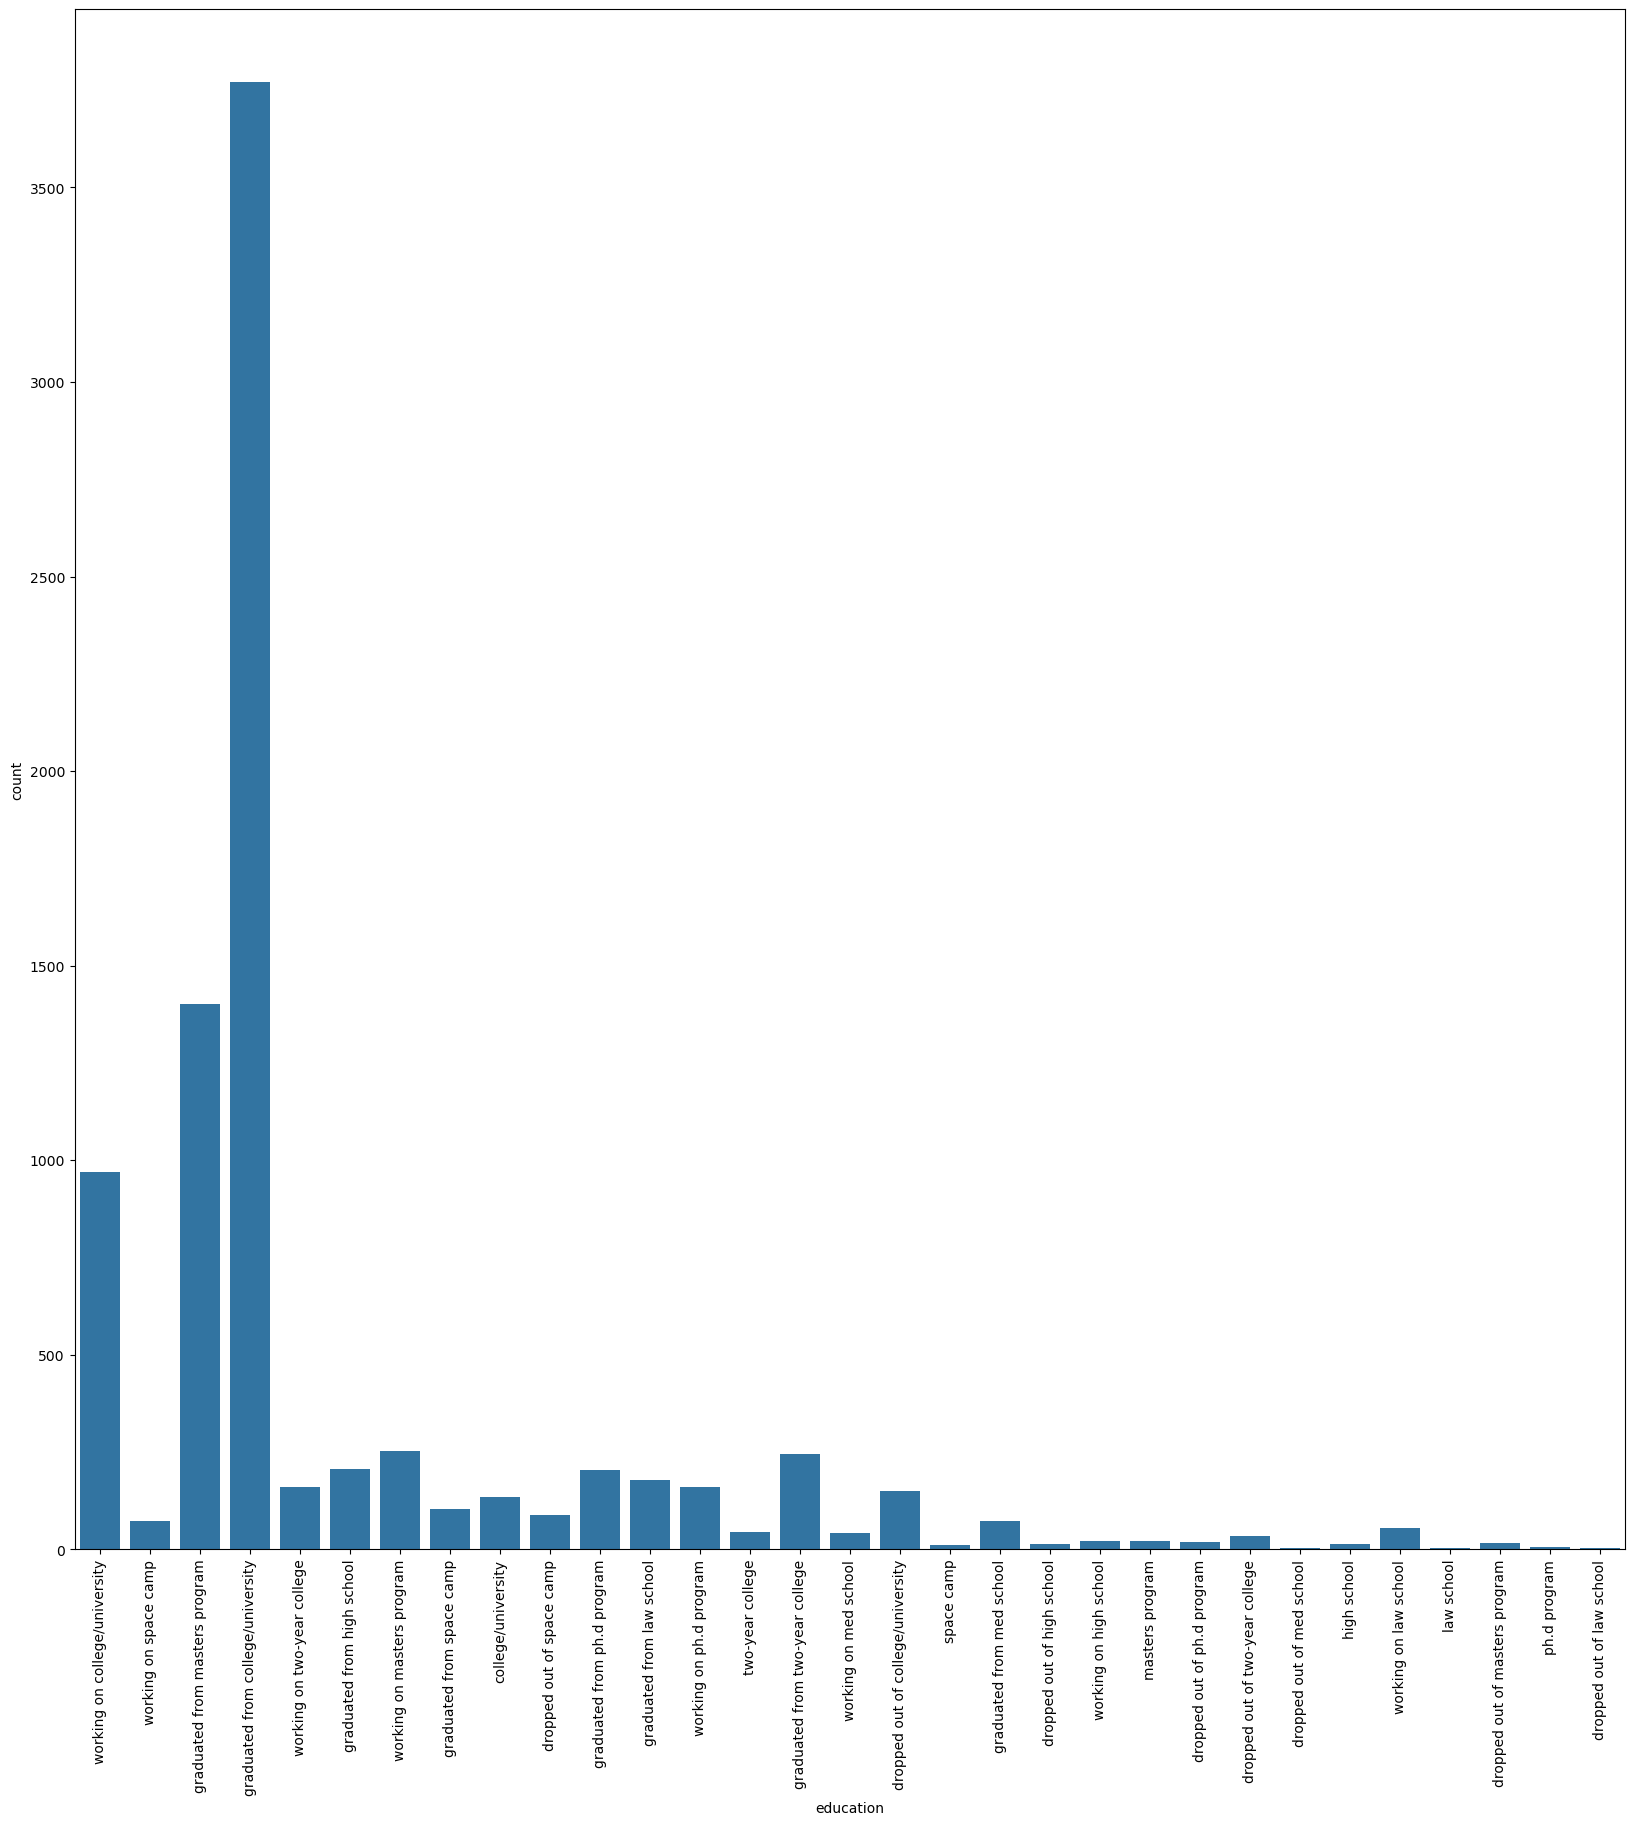

In [13]:
plt.figure(figsize=(20,20))
sns.countplot(x=df['education'])
plt.xticks(rotation=90);

<Axes: xlabel='age', ylabel='Density'>

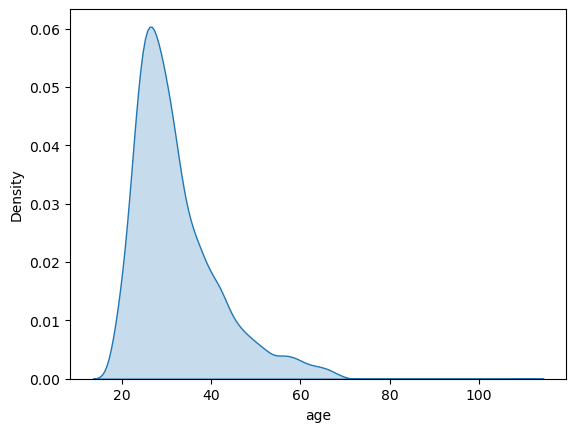

In [14]:
sns.kdeplot(df['age'],fill=True)

# Feature Engineering

I got the following Feature Engineering methods from kaggle

In [15]:
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df = df.drop(columns=essay_columns)

In [16]:
skinnystatus={"average":"fit",    
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(skinnystatus,inplace=True)       


/var/folders/7w/sfqhq6jd47gg5c2xyhv9229w0000gn/T/ipykernel_4443/1273579974.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.body_type.replace(skinnystatus,inplace=True)


In [17]:
df['diet'] = df['diet'].replace({
    'strictly anything': 'Anything',
    'mostly anything': 'Anything',
    'anything': 'Anything',
    'strictly vegan': 'Vegan',
    'mostly vegan': 'Vegan',
    'vegan': 'Vegan',
    'strictly vegetarian': 'Vegetarian',
    'mostly vegetarian': 'Vegetarian',
    'vegetarian': 'Vegetarian',
    'strictly other': 'Other',
    'mostly other': 'Other',
    'other': 'Other',
    'strictly halal': 'Halal',
    'mostly halal': 'Halal',
    'halal': 'Halal',
    'strictly kosher': 'Kosher',
    'mostly kosher': 'Kosher',
    'kosher': 'Kosher'
})

In [18]:
df['education'] = df['education'].replace({
    'working on college/university': 'Working on Education',
    'working on space camp': 'Working on Education',
    'graduated from masters program': 'Graduated',
    'graduated from college/university': 'Graduated',
    'working on two-year college': 'Working on Education',
    'graduated from high school': 'Graduated',
    'working on masters program': 'Working on Education',
    'graduated from space camp': 'Graduated',
    'college/university': 'Graduated',
    'dropped out of space camp': 'Dropped out of Education',
    'graduated from ph.d program': 'Graduated',
    'graduated from law school': 'Graduated',
    'working on ph.d program': 'Working on Education',
    'two-year college': 'Graduated',
    'graduated from two-year college': 'Graduated',
    'working on med school': 'Working on Education',
    'dropped out of college/university': 'Dropped out of Education',
    'space camp': 'Graduated',
    'graduated from med school': 'Graduated',
    'dropped out of high school': 'Dropped out of Education',
    'working on high school': 'Working on Education',
    'masters program': 'Graduated',
    'dropped out of ph.d program': 'Dropped out of Education',
    'dropped out of two-year college': 'Dropped out of Education',
    'dropped out of med school': 'Dropped out of Education',
    'high school': 'Graduated',
    'working on law school': 'Working on Education',
    'law school': 'Graduated',
    'dropped out of masters program': 'Dropped out of Education',
    'ph.d program': 'Graduated',
    'dropped out of law school': 'Dropped out of Education'
})


In [19]:
df['drinks'] = df['drinks'].replace({
    'socially': 'Moderate',
    'often': 'Frequent',
    'not at all': 'Never',
    'rarely': 'Rarely',
    'very often': 'Frequent',
    'desperately': 'Frequent'
})


In [20]:
df['job'] = df['job'].replace({ 
    'transportation': 'Other',
    'hospitality / travel': 'Other',
    'student': 'Other',
    'artistic / musical / writer': 'Artistic',
    'computer / hardware / software': 'Technology',
    'banking / financial / real estate': 'Finance',
    'entertainment / media': 'Media',
    'sales / marketing / biz dev': 'Sales',
    'other': 'Other',
    'medicine / health': 'Health',
    'science / tech / engineering': 'Science',
    'executive / management': 'Management',
    'education / academia': 'Education',
    'clerical / administrative': 'Administration',
    'construction / craftsmanship': 'Construction',
    'rather not say': 'Other',
    'political / government': 'Government',
    'law / legal services': 'Law',
    'unemployed': 'Other',
    'military': 'Other',
    'retired': 'Other'})


In [21]:
df=df.dropna(how='all')

In [22]:
df=df[['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'income', 'job',
       'sex', 'smokes', 'status']]

In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [24]:
df.isnull().sum()

age          0
body_type    0
diet         0
drinks       0
drugs        0
education    0
height       0
income       0
job          0
sex          0
smokes       0
status       0
dtype: int64

In [27]:
df=pd.get_dummies(data=df,drop_first=True)

Modelling

In [41]:
x=df.drop('age',axis=1)
y=df[['age']]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [43]:
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [44]:
pred=rfg.predict(x_test)

In [45]:
r2_score(pred,y_test)

-1.9809574611647056

In [46]:
mean_absolute_error(pred,y_test)

6.931592465418842

In [47]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
pred2=lr.predict(x_test)

In [49]:
r2_score(pred2,y_test)

-4.93686134271558

In [50]:
mean_absolute_error(pred,y_test)

6.931592465418842